# Visualizing the Interactions Life Cycle

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [39]:
# File Path
file_path = "../New_DB.xlsx"

# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, skiprows=1, sheet_name=None)

# Access each DataFrame by sheet name
life = all_sheets["Vida Post"]
life_x_cs = life[["Xcomments", "XRts", "Xlikes", "Days.1"]].copy()
life_x_xg = life[["Xcomments.1", "XRts.1", "Xlikes.1", "Days.1"]].copy()
life_x_av = life[["Xcomments.2", "XRts.2", "Xlikes.2", "Days.1"]].copy()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


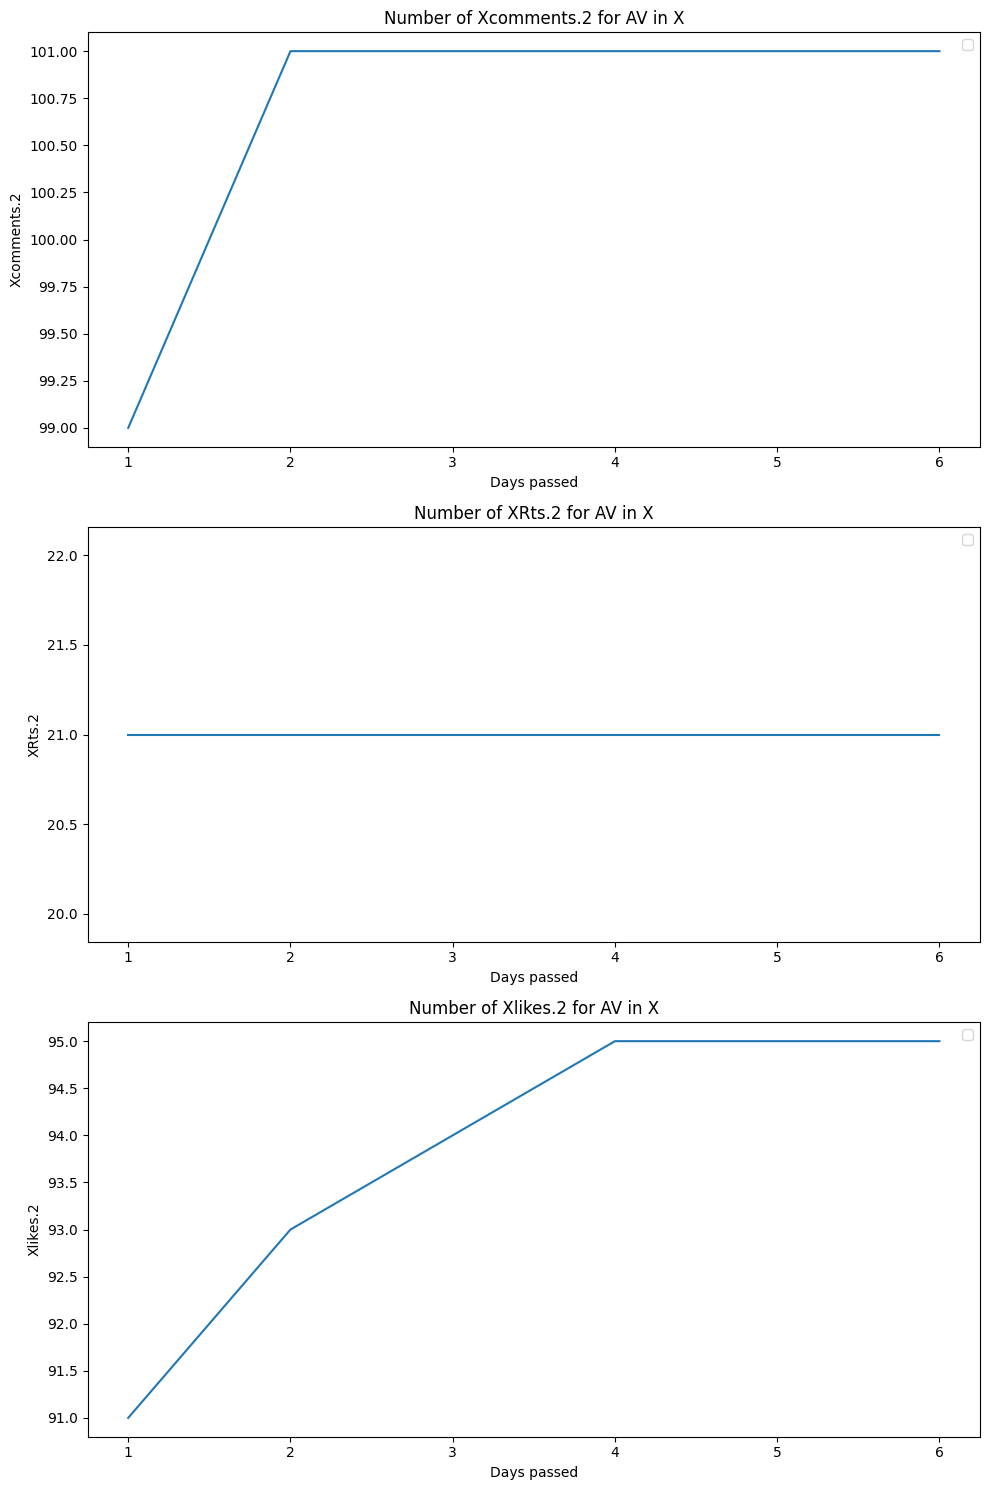

In [42]:
metrics = ["Xcomments.2", "XRts.2", "Xlikes.2"]

# Create subplots with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(10, 15))


for i, v in enumerate(metrics):

  # Select the current subplot
  ax = axs[i]
  ax.plot(life_x_av["Days.1"], life_x_av[v]) 

  # Set labels and title for the current subplot
  ax.set_title(f"Number of {v} for AV in X")
  ax.set_ylabel(f"{v}")
  ax.set_xlabel("Days passed")
  ax.legend()  # Add legend to distinguish candidate lines
# Adjust layout to prevent overlapping
plt.tight_layout()

plt.show()

# Visualizing the State of the Polls

In [52]:
# File Path
file_path = "../New_DB.xlsx"

# Read all sheets into a dictionary of DataFrames
polls = pd.read_excel(file_path, sheet_name="Polls")
polls = polls[["Encuestadora","XG", "CS", "JAM", "Diff", "Month"]]

In [60]:
polls.head(10)

,Encuestadora,XG,CS,JAM,Diff,Month
0,Simo,22,63,4,41,1
1,Mitofsky,27,51,5,24,1
2,Mendoza Blanco & Asoc,24,61,5,37,1
3,Enkoll,27,55,2,28,1
4,El Financiero,32,48,10,16,1
5,Demotecnia,14,66,2,52,1
6,Berumen,27,54,3,27,1
7,Varela y Asoc / Citibanamex,24,46,11,22,12
8,Simo,23,57,9,34,12
9,Parametría,26,53,5,27,12


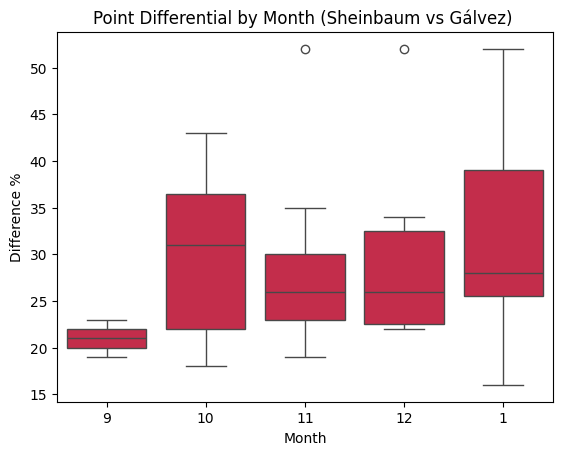

In [77]:
# Use seaborn for a more concise syntax
month_order = [9,10,11,12,1]
# Set a specific color for the boxes
boxplot_color = "crimson"
sns.boxplot(x="Month", y="Diff", data=polls, order=month_order, color=boxplot_color)
# Set labels and title
plt.xlabel("Month")
plt.ylabel("Difference %")
plt.title("Point Differential by Month (Sheinbaum vs Gálvez) ")
# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=0)
plt.show();

# Visualizing our Origin Database

## Creating the Databases

In [79]:
# File Path
file_path = "../New_DB.xlsx"

# Read all sheets into a dictionary of DataFrames
all_sheets = pd.read_excel(file_path, skiprows=1, sheet_name=None)

# Access each DataFrame by sheet name
galvez_df = all_sheets["Galvez"]
claudia_df = all_sheets["Claudia"]

# Convert 'Date' column to datetime if it's not already
galvez_df['Date'] = pd.to_datetime(galvez_df['Date'])
claudia_df['Date'] = pd.to_datetime(claudia_df['Date'])

# Adding a month column
galvez_df['Month'] = galvez_df['Date'].dt.month
claudia_df['Month'] = claudia_df['Date'].dt.month

## Independent Databases for each App

In [80]:
# DF for Galvez Social Media
Galvez_X = galvez_df[["Date", 'Month', "XPosts", "Xcomments", "XRts", "Xlikes", "XCommsPPost", "XRTsPPost", "XlikesPPost"]].copy()
Galvez_FB = galvez_df[["Date", 'Month', 'FBPosts', 'FBReactions', 'FBComments', "FBShares", "FBReactsPPost", "FBCommsPPost", "FBSharesPPost"]].copy()
Galvez_IG = galvez_df[["Date", 'Month', 'IGPosts', 'IGLikes', 'IGLikesPPost']].copy()
Galvez_Yt = galvez_df[["Date", 'Month', 'YTPosts', 'YTViews', 'YTViewsPPost']].copy()

# Df for Sheinbaum Social Media
Claudia_X = claudia_df[["Date", 'Month', "XPosts", "Xcomments", "XRts", "Xlikes", "XCommsPPost", "XRTsPPost", "XlikesPPost"]].copy()
Claudia_FB = claudia_df[["Date", 'Month', 'FBPosts', 'FBReactions', 'FBComments', "FBShares", "FBReactsPPost", "FBCommsPPost", "FBSharesPPost"]].copy()
Claudia_IG = claudia_df[["Date", 'Month', 'IGPosts', 'IGLikes', 'IGLikesPPost']].copy()
Claudia_Yt = claudia_df[["Date", 'Month', 'YTPosts', 'YTViews', 'YTViewsPPost']].copy()


### Averaging Number of ANY Interaction (Posts, Comments, Likes ...)

In [81]:
# Group by month and calculate the average number of posts
avg_metric_per_month_x_xg = Galvez_X.groupby(Galvez_X['Month'])['XPosts'].mean()
avg_metric_per_month_fb_xg = Galvez_FB.groupby(Galvez_FB['Month'])['FBPosts'].mean()
avg_metric_per_month_ig_xg = Galvez_IG.groupby(Galvez_IG['Month'])['IGPosts'].mean()
avg_metric_per_month_yt_xg = Galvez_Yt.groupby(Galvez_Yt['Month'])['YTPosts'].mean()

# Group by month and calculate the average number of posts
avg_metric_per_month_x_cs = Galvez_X.groupby(Galvez_X['Month'])['XPosts'].mean()
avg_metric_per_month_fb_cs = Galvez_FB.groupby(Galvez_FB['Month'])['FBPosts'].mean()
avg_metric_per_month_ig_cs = Galvez_IG.groupby(Galvez_IG['Month'])['IGPosts'].mean()
avg_metric_per_month_yt_cs = Galvez_Yt.groupby(Galvez_Yt['Month'])['YTPosts'].mean()

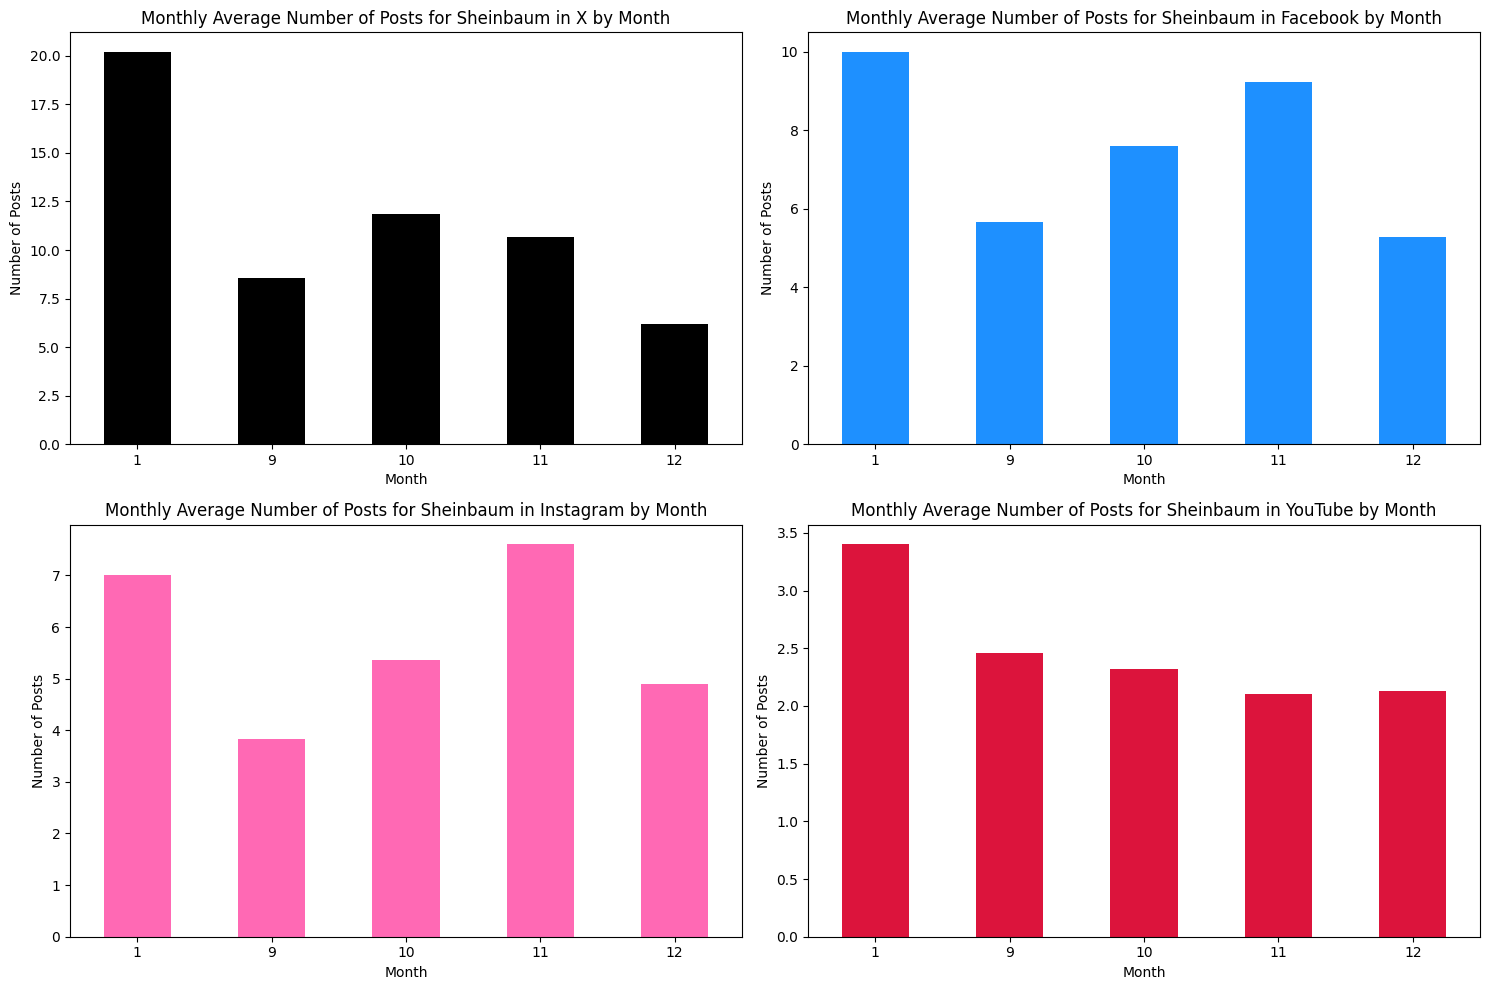

In [138]:
# Create a figure with four subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
metric = "Posts"
# Plot the average number of posts per month in each subplot
colors = ['black', 'dodgerblue', 'hotpink', 'crimson']
dfs = [avg_metric_per_month_x_cs, avg_metric_per_month_fb_cs, avg_metric_per_month_ig_cs, avg_metric_per_month_yt_cs]
networks = ["X", "Facebook", "Instagram", "YouTube"]

for i, ax in enumerate(axes.flatten()):
    dfs[i].plot(kind='bar', color=colors[i], ax=ax)
    ax.set_title(f'Monthly Average Number of {metric} for Sheinbaum in {networks[i]} by Month')
    ax.set_xlabel('Month')
    ax.set_ylabel(f'Number of {metric}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

## Overall